# \[7\]RNN

전준한  
2023-12-24

# RNN (순환신경망)

-   이전의 입력의 변수를 계속 사용한다는 것에 의미가 존재 ( 시퀀스에
    유리)
-   RNN 은 잦은 개선으로 LSTM 의 등장

## LSTM (Long Short Term Memory)

-   RNN 내부의 구조도 개선한 방식
-   기초 RNN 구조의 기울기 소실 문제를 보완한 방법으로 반복 직전의 다음
    층으로 기억된 값을 넘길지 안 넘길지 관리하는 단계를 추가한 방법

### `[1]` LSTM 카테고리 분류하기

`1 Import`

In [4]:
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding
from keras.preprocessing import sequence

In [6]:
from tensorflow.keras.utils import to_categorical

In [3]:
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

In [7]:
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

`[2] 모델 만들기`

In [8]:
(X_train,Y_train),(X_test,Y_test) = reuters.load_data(num_words=1000, test_split=0.2)
category = numpy.max(Y_train) +1
print(category,'카테고리')
print(len(X_train),'학습용뉴스')
print(len(X_test),'테스트용뉴스')
print(X_train[0])

2110848/2110848 [==============================] - 0s 0us/step
46 카테고리
8982 학습용뉴스
2246 테스트용뉴스
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]

In [10]:
# x_train =sequence.pad_sequences(X_train,maxlen=100)
# x_test =sequence.pad_sequences(X_test,maxlen=100)
# y_train = np_utils.to_categorical(Y_train) #이전코드
# y_test = np_utils.to_categorical(Y_test)


In [9]:
from tensorflow.keras.utils import to_categorical

x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)
y_train = to_categorical(Y_train)  # np_utils.to_categorical 대신 to_categorical 사용
y_test = to_categorical(Y_test)


In [12]:
model = Sequential()
model.add(Embedding(1000,100))
model.add(LSTM(100,activation='tanh'))
model.add(Dense(46,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train,y_train,batch_size=100,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
90/90 [==============================] - 9s 82ms/step - loss: 2.5827 - accuracy: 0.3460 - val_loss: 2.2901 - val_accuracy: 0.3620
Epoch 2/20
90/90 [==============================] - 7s 78ms/step - loss: 2.3067 - accuracy: 0.3917 - val_loss: 2.0693 - val_accuracy: 0.5036
Epoch 3/20
90/90 [==============================] - 7s 77ms/step - loss: 2.0138 - accuracy: 0.4958 - val_loss: 1.8937 - val_accuracy: 0.5285
Epoch 4/20
90/90 [==============================] - 7s 74ms/step - loss: 1.7928 - accuracy: 0.5442 - val_loss: 1.7842 - val_accuracy: 0.5677
Epoch 5/20
90/90 [==============================] - 7s 74ms/step - loss: 1.6979 - accuracy: 0.5669 - val_loss: 1.7077 - val_accuracy: 0.5628
Epoch 6/20
90/90 [==============================] - 7s 75ms/step - loss: 1.6262 - accuracy: 0.5826 - val_loss: 1.6480 - val_accuracy: 0.5761
Epoch 7/20
90/90 [==============================] - 7s 73ms/step - loss: 1.5504 - accuracy: 0.6097 - val_loss: 1.5901 - val_accuracy: 0.6024
Epoch 8/20
90

71/71 [==============================] - 1s 11ms/step - loss: 1.2209 - accuracy: 0.7075

 Test Accuracy: 0.7075

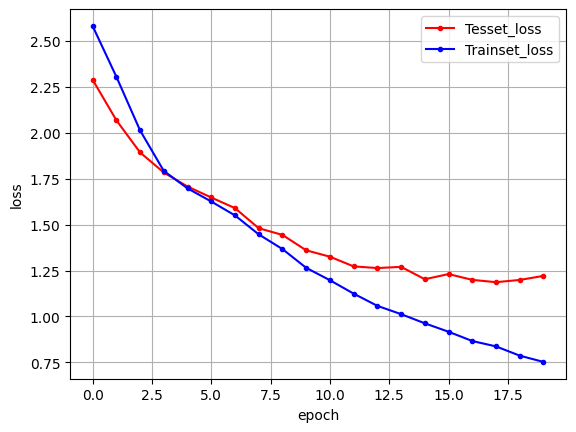

In [14]:
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test,y_test)[1]))

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = numpy.arange(len(y_loss))
plt.plot(x_len,y_vloss,marker='.' , c="red",label='Tesset_loss')

plt.plot(x_len,y_loss,marker='.' , c="blue" , label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [15]:
# 테스트오차가 올라가기직전에 끊어서 earlystopping 을 수동적으로 잘 했다고 볼 수 있다!

-   Embedding(1000,100) 은 \[6\] 에서 언급했 듯 1000차원을 100차원으로
    축소시킨것
-   100차원에서 LSTM 을 이용한 RNN 으로 오차역전파를 사용하며 각각의
    노드를 학습
-   Dense 는 fullyconnected 를 의미하며 풀리커넥티드 46 node 로 layer
    층을 softmax 시키기